# Estudo dos dados do PENSE

O estudo realizado nesse Notebook objetiva fazer uma análise dos dados do PENSE (Pesquisa Nacional de Saúde do Escolar), que investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  

Nesta edição, que é de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio, que essa segunda amostra é a que será utilizada nesse estudo. A segunda amostra, por sua vez, proporciona melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para o grupo etário considerado, e viabiliza maior comparabilidade com indicadores internacionais, em especial aqueles provenientes da OMS.

## Objetivo da análise

A primeira parte desse notebook é compreender melhor os dados do dataset. Mas o objetivo da análise realizada nesse notebook é fazer uma comparação das respostas de algumas categorias de acordo com a sua cor ou raça.

## Construção do DataFrame e Tratamento dos dados

O Site do IBGE disponibiliza os dados em Zip para fazer o download. O download foi feito e colocado no Drive para os arquivos serem usados diretamente do Drive.


### Importação dos dados e bibliotecas

In [1]:
# importação de bibliotecas que serão usadas

from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch




In [2]:
path = "/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(path)
caminho_pasta_zipada = zip.namelist()[1]

In [3]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands=".", decimal=",")

In [4]:
dados.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [6]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,3.256040,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,11.317482,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.00000

### Checagem e tratamento dos dados

In [7]:
# Checar se existem dados NaN do DataFrame

dados.isna().sum().sum()

432

In [8]:
# Checagem das colunas com NaN

colunas_nan = dados.loc[:, dados.isnull().any()].columns
colunas_nan

Index(['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST',
       'VB17001', 'VB17002'],
      dtype='object')

In [9]:
# Mostrar somente as linhas com dados NaN

df_nan = dados[dados.isnull().T.any()]
df_nan.sample(8)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
10736,2015,76,4,1,2,4,11,11,9,1,2,8,6,2,-1,1,1,2,1,2,2,2,2,1,3,99,1,6,5,8,1,8,2,8,2,1,1,1,1,1,...,2,1,1,1,1,4,1,10,3,1,2,-1,1,1,2,2,2,2,2,1,2,2,2,2,453.0,1458.0,45.3,145.8,2,3,4123,4,437.252247,1,1,2,-1,10737,238,330
8709,2015,76,3,1,1,99,17,9,3,1,2,7,6,2,-1,1,1,1,1,1,2,3,2,6,1,2,2,5,4,6,2,6,2,4,2,1,4,1,4,1,...,2,1,3,2,2,4,2,-1,2,2,2,7,1,-1,2,2,1,2,2,2,2,2,2,2,895.0,1832.0,89.5,183.2,2,3,3123,3,3901.258678,1,1,2,-1,8710,192,250
12820,2015,76,4,1,2,4,14,12,6,2,2,8,5,2,-1,2,1,2,2,1,2,2,2,3,3,1,2,5,3,4,2,8,4,8,7,1,1,6,4,1,...,2,3,2,4,1,4,2,-1,3,2,1,-1,1,1,2,2,2,2,2,2,1,2,2,2,460.0,1575.0,46.0,157.5,2,2,4121,4,688.322311,1,1,3,-1,12821,288,350
10897,2015,76,4,1,1,1,11,4,10,1,1,8,4,2,-1,1,1,1,1,1,1,2,2,1,1,2,2,1,99,8,2,8,4,7,1,1,4,1,1,1,...,2,2,1,3,1,4,2,-1,2,1,1,99,1,-1,2,2,1,2,2,2,2,2,2,2,NaN,NaN,43.1,150.3,1,2,4121,4,303.522823,1,1,2,-1,10898,241,121
11442,2015,76,4,1,1,4,17,9,3,2,2,8,9,1,1,1,1,1,1,1,1,3,2,7,4,2,2,5,3,8,8,8,2,8,1,1,1,1,4,1,...,2,2,1,4,1,3,2,-1,2,4,1,13,1,-1,2,2,2,2,2,2,2,1,2,2,NaN,NaN,72.5,168.7,1,3,4123,4,836.371957,1,1,2,-1,11443,253,540
654,2015,76,1,1,1,4,12,3,9,1,1,2,4,2,-1,2,1,2,2,2,1,2,2,2,1,2,1,5,1,8,3,4,3,8,2,1,1,1,1,1,...,2,1,4,1,1,4,1,11,1,2,4,7,1,-1,2,2,1,2,2,2,2,2,2,2,405.0,1517.0,40.5,151.7,2,2,1111,1,359.153373,2,1,3,-1,655,16,210
8435,2015,76,3,1,1,2,19,1,1,1,1,5,4,2,-1,1,1,1,1,2,2,2,2,7,4,1,2,2,3,99,2,2,2,2,2,5,5,5,4,1,...,2,2,99,2,1,3,1,3,1,2,1,4,2,-1,2,2,2,2,2,1,2,2,2,2,NaN,NaN,62.2,171.0,1,2,3122,3,3267.794903,1,1,2,-1,8436,186,293
12909,2015,76,4,1,1,1,17,4,2,1,1,8,5,2,-1,2,1,2,1,1,2,3,2,7,1,2,2,2,2,8,5,4,8,5,8,1,1,1,4,1,...,99,99,99,1,2,4,99,-1,99,99,99,-1,99,-1,99,99,99,99,99,99,99,99,99,99,NaN,NaN,54.1,169.3,1,2,4123,4,1104.491197,1,1,2,-1,12910,290,348


In [10]:
# Mostrar onde temos dados NaN

df_nan[colunas_nan].isna().sum()

TEMPODESLOC     33
TEMPOTOTAL      20
TEMPOEDFIS      84
TEMPOEXTRA      93
TEMPOEST       110
VB17001         45
VB17002         47
dtype: int64

In [11]:
df_nan[colunas_nan].sample(8)

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002
10629,0.0,0.0,0.0,NaN,0.0,299.0,1385.0
10017,0.0,455.0,130.0,325.0,120.0,NaN,NaN
10641,30.0,490.0,70.0,390.0,NaN,467.0,1713.0
3869,NaN,0.0,NaN,0.0,NaN,436.0,1532.0
16212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,335.0,375.0,10.0,30.0,0.0,NaN,NaN
14390,NaN,130.0,0.0,130.0,420.0,742.0,1766.0
3545,0.0,65.0,65.0,0.0,NaN,503.0,1611.0


Ao ver as colunas com dados NaN, cheguei ao problema de compreender o que as perguntas significam, uma vez que em alguns casos são conjuntos de letras e números para especificar a pergunta.

#### Facilitando a compreensão das perguntas

Com a criação de funções

In [12]:
excel = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

dados_excel = pd.read_excel(excel)

In [13]:
# Montar o dicionario de codigo da coluna e qual é a pergunta referente ao código

dados_excel.set_index('VARIÁVEL', inplace = True)
dicionario_perguntas = {}
colunas_perguntas = list(dados.columns)

for i in colunas_perguntas:
  dicionario_perguntas[i] = dados_excel.loc[i][0]


# Definição de uma função para mostrar qual a pergunta referente ao código da coluna

def qual_a_pergunta(codigo : str):
  return print("A pergunta do código {} é: '{}'.".format(codigo,dicionario_perguntas[codigo]))

In [14]:

# Montar o dicionário das respostas das perguntas!
dados_excel.reset_index(inplace=True)
dicionario_respostas = {}
lista_indexes = []

# A função abaixo monta uma lista com o index das linhas do arquivo excel, em que temos perguntas

for variavel in dados_excel["VARIÁVEL"]:
  if variavel in colunas_perguntas:
    lista_indexes.append(dados_excel.query(f"VARIÁVEL == '{variavel}'").index[0])


''' 
Essa parte do código faz um looping dentro do range da quantidade de dados
da lista montada anteriormente. Cada vez que ela itera ela usa o valor daquele número inteiro
dentro daquela lista de indexes, assim se o primeiro index for o 5, ele na primeira interação
busca o index 5 com a função loc, porém como só quero as respostas, adicionamos +1 ao index
para buscar somente as respostas. Para delimitar ele busca no próximo item da lista de indexes
qual é o index e dessa vez substrai 1 do valor para selecionar somente os items dessa uma
única resposta. Assim atribui esse dataframe à uma variavel à um dicionário que foi 
adicionado no dicionário definido nessa célula como dicionario_respostas
'''

for i in range(len(lista_indexes)+1):
  if i == 180:
    dict_temp = dados_excel.loc[lista_indexes[i]+1:].set_index("VARIÁVEL")
    dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()  
  else:
    try:
      dict_temp = dados_excel.loc[lista_indexes[i]+1:lista_indexes[i+1]-1].set_index("VARIÁVEL")
      dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()
    except Exception:
      pass

  dicionario_respostas.update(dict_temp)

# Definição da função para retornar como são as respostas daquele código

def como_respostas(codigo:str):
  if dicionario_respostas[codigo] == {}:
    print("Resposta impossível de classificar") 
  else:
    return  dicionario_respostas[codigo]

In [15]:
# A ideia dessa função é mostrar o que aquela código de coluna significa,
#mostrando a pergunta, e as possíveis respostas.

def descricao_pergunta(coluna : str):
  qual_a_pergunta(codigo = coluna)
  if dicionario_respostas[coluna] == {}:
    print("As respostas não foram possíveis de classificar, verifique diretamente no DataFrame")
  else:
    print("Respostas:")
    return dicionario_respostas[coluna]

In [16]:
descricao_pergunta("VB01004")

A pergunta do código VB01004 é: 'Qual é o mês do seu aniversário?'.
Respostas:


{1: 'Janeiro',
 2: 'Fevereiro',
 3: 'Março',
 4: 'Abril',
 5: 'Maio',
 6: 'Junho',
 7: 'Julho',
 8: 'Agosto',
 9: 'Setembro',
 10: 'Outubro',
 11: 'Novembro',
 12: 'Dezembro',
 99: 'Não informado'}

In [17]:
dicionario_respostas["VB01002"]

{'1': 'Branca',
 '2': 'Preta',
 '3': 'Amarela',
 '4': 'Parda',
 '5': 'Indígena',
 99: 'Não informado'}

In [18]:
qual_a_pergunta(dados.columns[57])

A pergunta do código VB03011A é: 'NOS ÚLTIMOS 7 DIAS, em quantos dias você fez atividade física por pelo menos 60 minutos (1 hora) por dia? (Some todo o tempo que você gastou em qualquer tipo de atividade física EM CADA DIA)'.


### Checagem e tratamento dos dados pt.2

In [20]:
dados["IMC"] = (dados["VB17003"]/(dados["VB17004"]/100)**2).round(2)

In [21]:
# Além do indice número, também utilizarei as nomeclaturas

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo","normal", "sobrepeso", "obesidade"]

dados["classe_IMC"] = pd.cut(x = dados["IMC"], 
                             bins = classes,
                             labels = labels,
                             include_lowest = True)

In [22]:
dados[["IMC","classe_IMC"]]

,IMC,classe_IMC
0,15.05,abaixo
1,21.73,normal
2,18.50,abaixo
3,23.32,normal
4,28.12,sobrepeso
...,...,...
16551,20.11,normal
16552,17.93,abaixo
16553,23.97,normal
16554,19.00,normal


### Análise Exploratória

In [23]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241,20.958237
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453,4.244454
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.400000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.000000,3.

In [24]:
# Distribuição de participantes por sexo
def dist_valor(coluna:str):
  dist = pd.DataFrame(dados[coluna].value_counts(normalize = True)*100)
  dist.index = dist.index.astype("string")
  dist.rename(index= dicionario_respostas[coluna], columns = dicionario_perguntas, inplace=True)
  dist.rename(index = {'99' :"Não Informado"}, inplace = True)
  return dist


In [25]:
# Cruzamento de dados

def cruzar_dados(indice, colunas, normalizado = None):
  if normalizado == None:
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas],
                                       margins=True, margins_name="Total"))
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  elif normalizado != None:
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas], 
                                         normalize= normalizado,
                                         margins=True, margins_name="Total"))*100
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  else:
    cruzado = print("Erro")
  
  return cruzado

In [26]:
dist_valor("VB01002")

,Qual é a sua cor ou raça?
Parda,40.625755
Branca,39.713699
Preta,11.711766
Amarela,4.300556
Indígena,3.509302
Não Informado,0.138922


In [27]:
cruzar_dados("VB01002","VB01001", "columns")

VB01001,Masculino,Feminino,Total
VB01002,,,
Branca,41.341861,38.081993,39.713699
Preta,13.334138,10.085863,11.711766
Amarela,3.644262,4.958278,4.300556
Parda,37.830337,43.427258,40.625755
Indígena,3.704598,3.313581,3.509302
Não informado,0.144805,0.133027,0.138922


In [28]:
sns.set_theme(style = 'darkgrid')

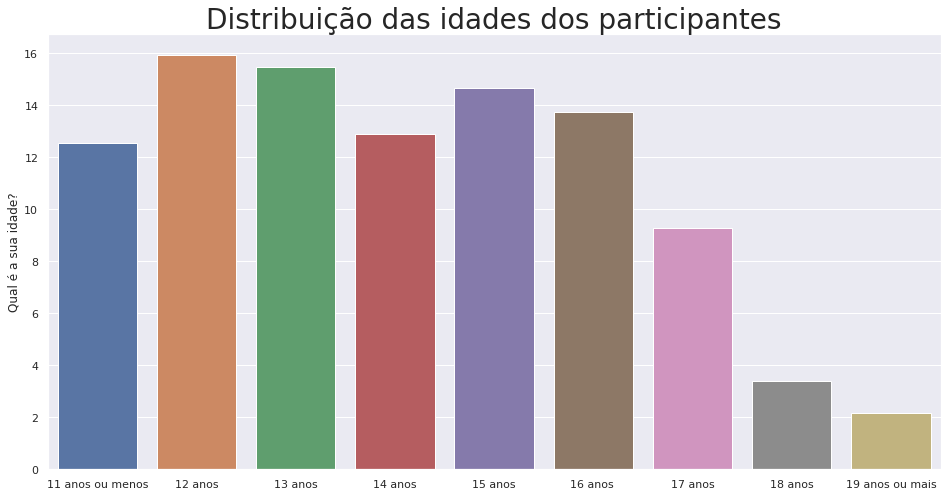

In [29]:
# Distribuição simples da idade dos participantes

df_temp = dist_valor("VB01003").round(2).sort_index()

ax = sns.barplot(x=df_temp.index, y = df_temp[df_temp.columns[0]])
ax.set_title("Distribuição das idades dos participantes", fontsize = 28)
ax.figure.set_size_inches(16,8)

Como a pesquisa é feita justamente de alunos do 6º ao 9º ano no ensino fundamental e do 1º ao 3º ano do ensino médio, os números não foram surpreendentes, uma vez que o 6º ano a idade dos alunos geralmente variam entre 10 e 12 anos e a idade mais comum de término do ensino médio é de 17 anos, mas tbm pode variar entre 16 à 18 anos. Esses números não são levando em consideração possíveis reprovações, mas somente a sequencia adequada das séries.

## Estudo de dados com comparação racial nas vivências dos escolares.

Os dados de estudo foram selecionados e as criações e tratamentos de dados feitos até então servirão para apoiar a análise que será realizada agora.

As categorias que as perguntas serão analisadas comparando como os participantes de diferentes cores ou raças responderam serão:

- Situação socioeconômica;
- Situação familiar;
- Cigarro, Bebidas Alcoólicas e Drogas Ilícitas;
- Situações na Escola/Bullying.

A pesquisa não visa compreender o panorama geral das diferencias de vivências, assim como também não tentará explicitar experiências especificas. As categorias escolhidas foram selecionadas para tentar mostrar vivências diferentes.


### Preparação do estudo

In [30]:
# Criação de dois DataFrames, um somente com os participantes Brancos
#e o outro de todos as outras raças

dados_brancos = dados[dados["VB01002"] == 1].copy()
dados_racas = dados[dados["VB01002"] != 99].copy()
dados_pretos_e_pardos = dados.query("VB01002 == 2 | VB01002 == 4").copy()


In [31]:
dicionario_raca = {'1': 'Branca',
                   '2': 'Preta',
                   '3': 'Amarela',
                   '4': 'Parda',
                   '5': 'Indígena'}

dados_racas['raca'] = dados_racas["VB01002"].map(lambda x: dicionario_raca[str(x)])
dados_racas['raca'].unique()

array(['Branca', 'Parda', 'Amarela', 'Indígena', 'Preta'], dtype=object)

In [32]:
cruzar_dados("VB01002","VB01003","columns")

VB01003,11 anos ou menos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,18 anos,19 anos ou mais,Total
VB01002,,,,,,,,,,
Branca,45.270270,39.521640,37.446310,36.990155,42.103093,40.616740,39.622642,36.234458,25.484765,39.713699
Preta,10.231660,11.731207,11.128465,12.798875,10.639175,12.158590,12.036435,15.985790,14.127424,11.711766
Amarela,3.812741,5.353075,4.139008,4.828880,4.371134,3.700441,4.163956,2.841918,3.601108,4.300556
Parda,34.893822,38.496583,43.108161,41.772152,40.536082,40.881057,42.550423,42.273535,52.908587,40.625755
Indígena,5.405405,4.669704,3.982819,3.563057,2.309278,2.643172,1.561483,2.486679,3.878116,3.509302
Não informado,0.386100,0.227790,0.195236,0.046882,0.041237,0.000000,0.065062,0.177620,0.000000,0.138922


A distribuição das respostas por idade e raça só muda quando são alunos de 19 anos ou mais. Que já pode ser considerado um ponto de reflexão, uma vez que alunos com essa idade são alunos que repetiram alguma vez um ano escolar.


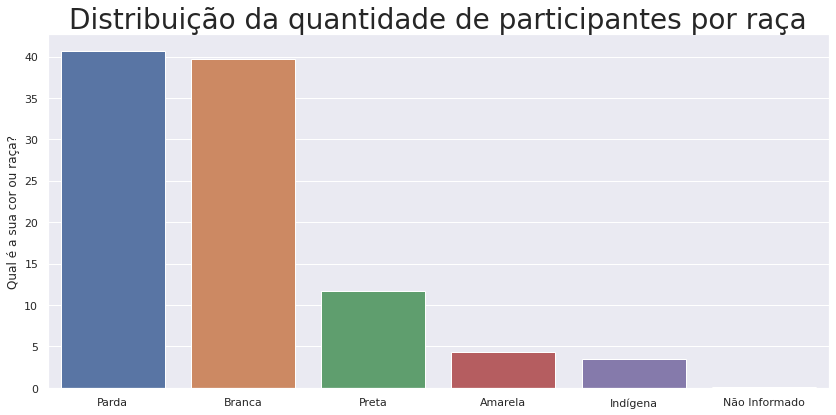

In [33]:
# Distribuição simples da raça dos participantes

df_temp = dist_valor("VB01002").round(2)

ax = sns.barplot(x=df_temp.index, y = df_temp[df_temp.columns[0]])
ax.set_title("Distribuição da quantidade de participantes por raça", fontsize = 28)
ax.figure.set_size_inches(14,6.5)

Pela quantidade tão baixa de participantes "Não-informados" os mesmos não serão contabilizados.

In [34]:
colors = ['tab:blue','tab:orange','tab:green','tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan',
          'black', 'palegreen', 'deeppink', 'gold', 'bisque']

In [35]:
# Definirei a função que irei usar para plotar o gráfico principal p/ as análises

def comparacao_barra_norm(pergunta:str, valor_comparado:str, titulo = None,
                          bbox = None, tamanho = None, ylimite = None,
                          texto = None):
  
  # Definição de variáveis usadas dentro da função
  x = pergunta
  y = 'Porcentagem'
  qtde = len(dados_racas[x].unique())
  hue = valor_comparado
  legend_elements = []

  # Definição do Dataframe que será plotado
  #
  #  Nele, seleciona-se inicialmente a Series da coluna que quero analisar os
  #dados e eles são agrupados pela coluna que criei das raças. 
  #Depois disso os valores são agrupados e normalizados.
  #Por fim o valor normalizado é renomeado para facilitar a plotagem do eixo y e
  #o index é resetado para para a formação desse DataFrame 
  prop_df = (dados_racas[x]
            .groupby(dados_racas[hue])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())


  # O gráfico de barras usa o eixo X o valor que nesse caso é o das raças, 
  #o eixo y o valor das porcentagens criadas da normalização dos dados.
  #importante frisar que a palette de cores foi criada por manualmente.
  ax = sns.barplot(x=hue, y=y, hue=x, data=prop_df, 
                  palette=colors)

  #Para caso queira mudar o tamanho da função caso não queria o tamanho padrão.
  if tamanho == None:
    ax.figure.set_size_inches(14,6)
  else:
    ax.figure.set_size_inches(tamanho)

  # Definição dos valores manualmente para as legendas. Usando o dicionario
  #criado das de respostas e a lista com as novas cores também.
  for i in range(len(dados_racas[x].unique())):
    labels = list(dicionario_respostas[x].values())
    temp = Patch(facecolor= colors[i], edgecolor='w', label= labels[i])
    legend_elements.append(temp)
  
  #Caso queira mudar a posição da caixa de legenda.
  if bbox == None:
    ax.legend(handles=legend_elements, bbox_to_anchor= (1,1), fontsize = 12)
  else:
    ax.legend(handles=legend_elements, bbox_to_anchor= bbox, fontsize = 12)

  #Formatação dos ticks do y para porcentagem
  ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

  ax.set_ylabel(y, fontsize = 22)
  ax.set_xlabel("Raça", fontsize = 22)
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 13)

  # Caso queira mudar os limites de visualização do eixo y
  if ylimite == None:
    pass
  else:
    plt.ylim(ylimite)

  # Caso queira colocar uma observação ao gráfico plotado
  if texto == None:
    pass
  else:
    plt.text(x= 0 , y= -0.23, s = texto, fontsize = 10,transform=ax.transAxes)
  
  # O título vem da pergunta usada na pesquisa, caso ela seja muito grande é
  #possível mudar.
  if titulo == None:
    ax.set_title(dicionario_perguntas[x], fontsize = 25)
  else:
    ax.set_title(titulo, fontsize = 25)
  

  plt.show()


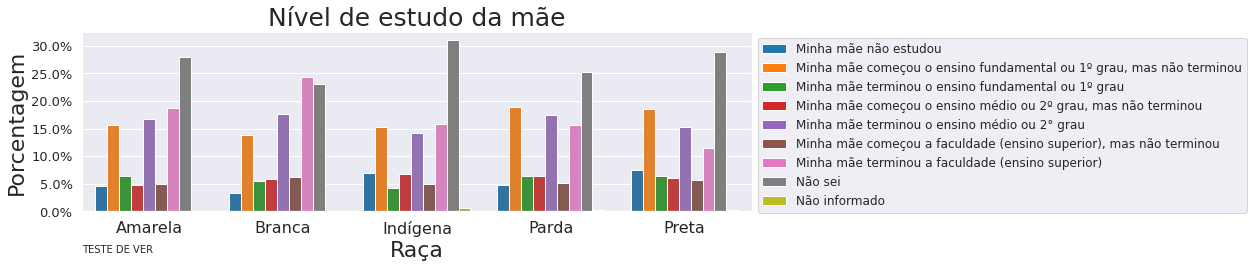

In [36]:
# Teste de aplicação da função

comparacao_barra_norm("VB01008A","raca", "Nível de estudo da mãe", tamanho = (12,3.3), texto = "TESTE DE VER")

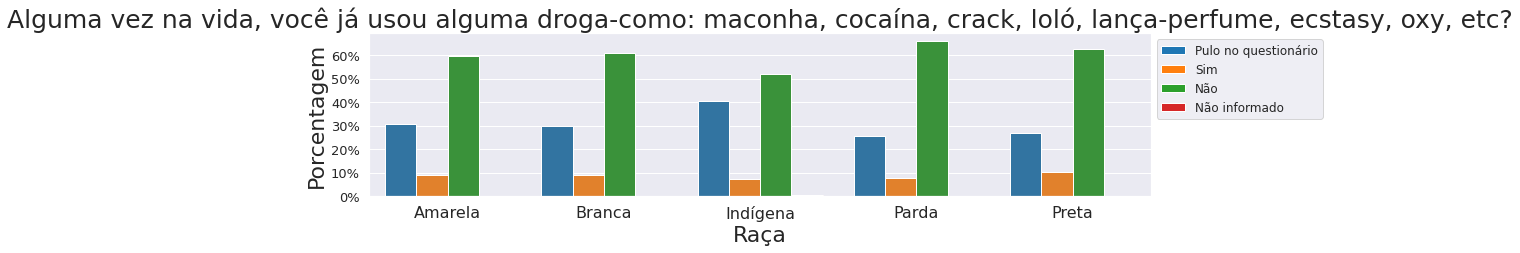

In [37]:
# Teste de aplicação da função

comparacao_barra_norm("VB06001","raca", tamanho=(14,3))

### Situação socioeconômica

No questionário existem algumas perguntas sobre alguns bens materiais. A intenção dessas perguntas é medir o nivel socioeconômica dos alunos respondentes. 

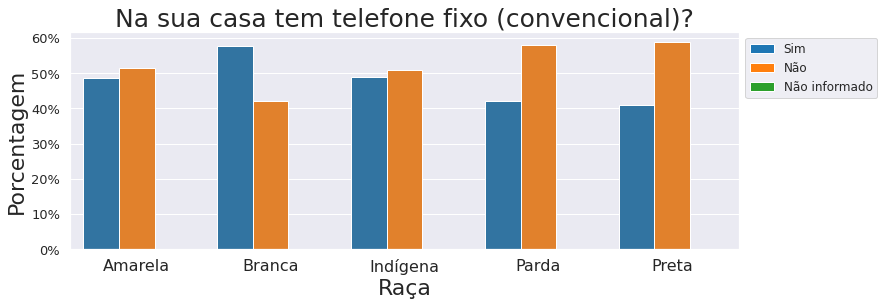

In [42]:
comparacao_barra_norm("VB01013","raca", tamanho=(12,4))

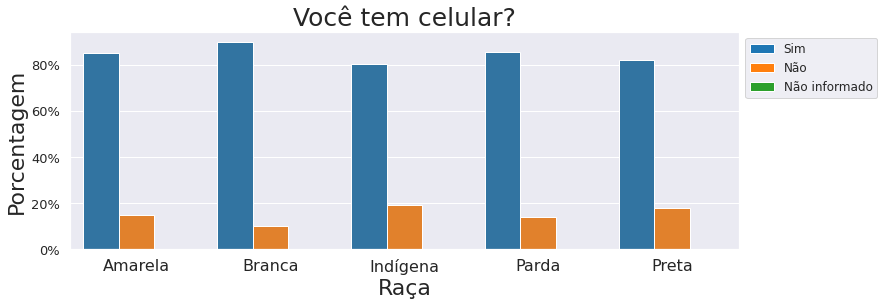

In [43]:
comparacao_barra_norm("VB01014","raca", tamanho=(12,4))

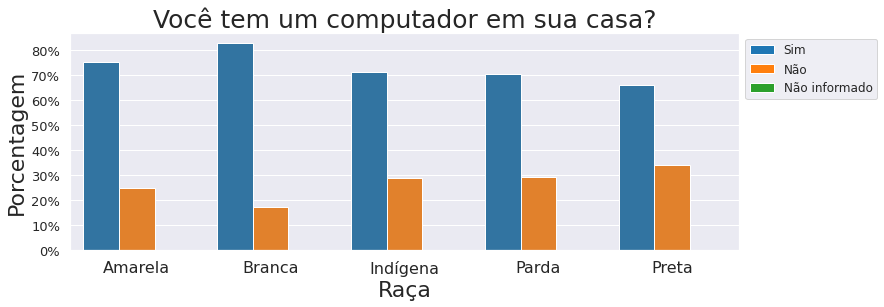

In [44]:
comparacao_barra_norm("VB01015A","raca", tamanho=(12,4),titulo="Você tem um computador em sua casa?")

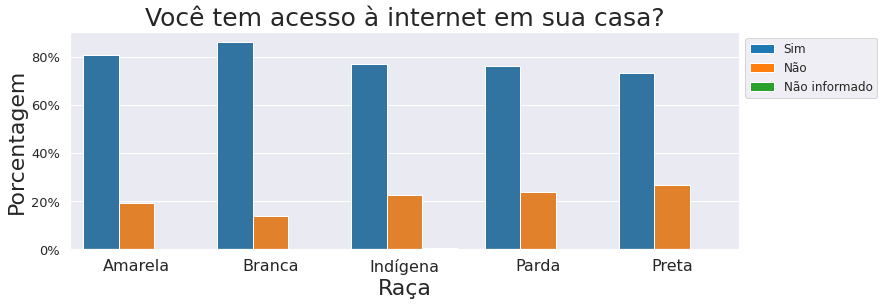

In [45]:
comparacao_barra_norm("VB01016","raca", tamanho=(12,4)) 

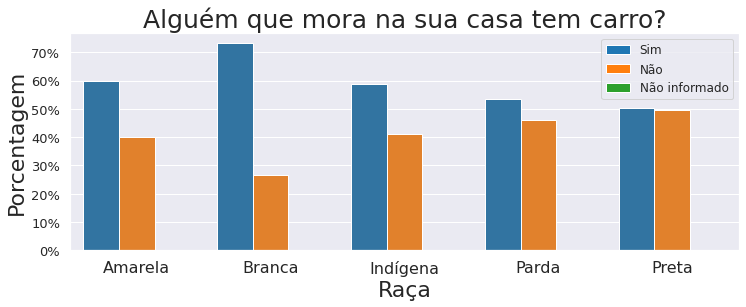

In [46]:
comparacao_barra_norm("VB01017","raca", tamanho=(12,4))

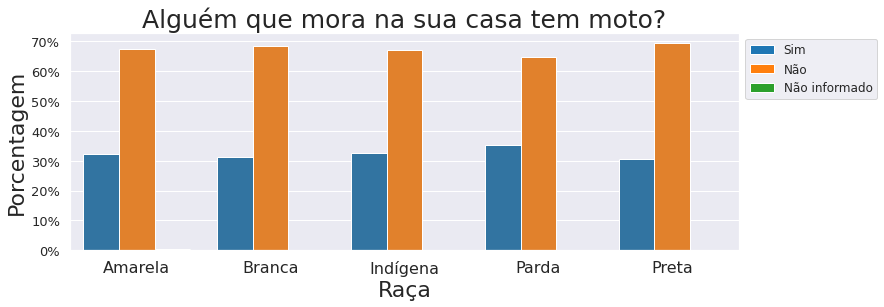

In [47]:
comparacao_barra_norm("VB01018","raca", tamanho=(12,4))

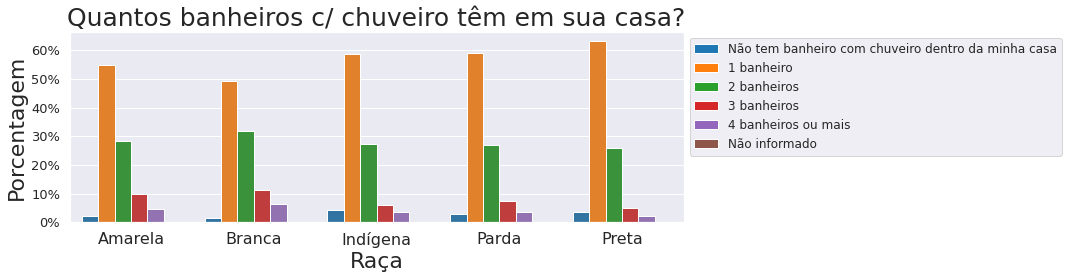

In [48]:
comparacao_barra_norm("VB01019","raca", 'Quantos banheiros c/ chuveiro têm em sua casa?' , tamanho=(11,3.5))

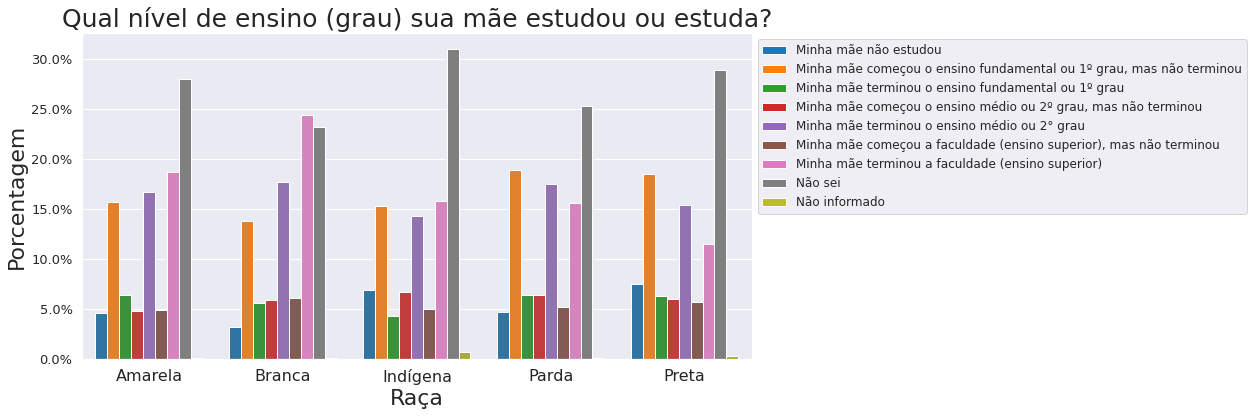

In [80]:
comparacao_barra_norm("VB01008A","raca", tamanho=(12,6))

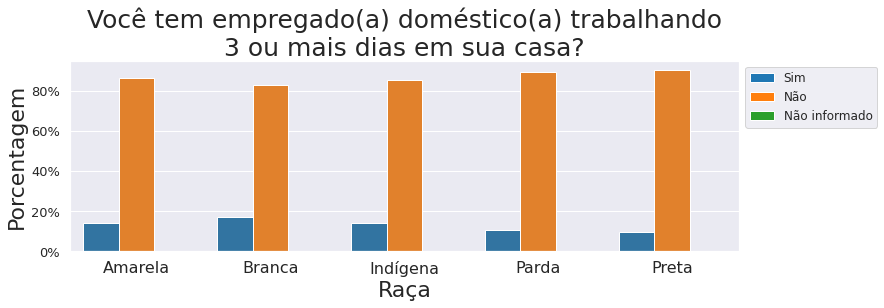

In [50]:
comparacao_barra_norm("VB01020A","raca", 
                      titulo="Você tem empregado(a) doméstico(a) trabalhando\n3 ou mais dias em sua casa?",
                      tamanho=(12,3.5))

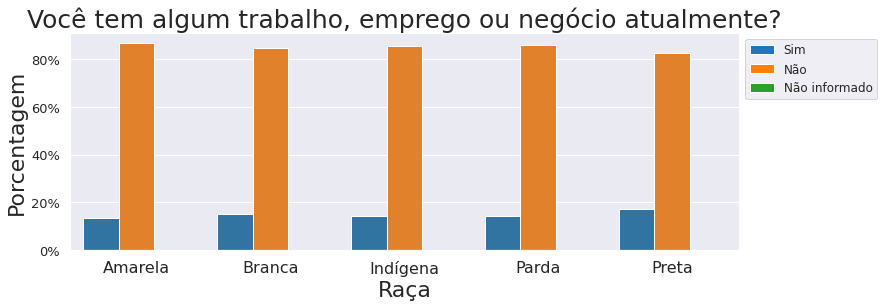

In [51]:
comparacao_barra_norm("VB01011","raca", tamanho=(12,4))

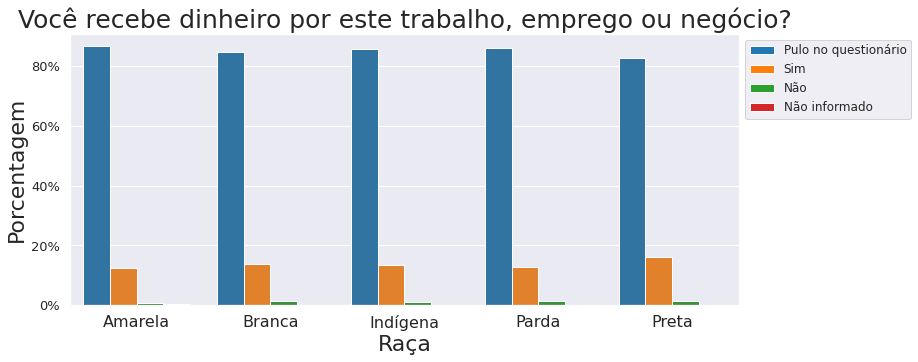

In [52]:
comparacao_barra_norm("VB01012","raca", tamanho=(12,5))

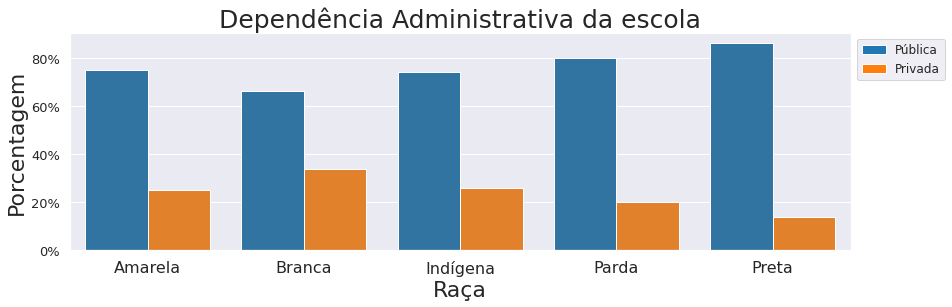

In [53]:
comparacao_barra_norm("V0007",'raca', tamanho = (14,4))

A grande maioria das perguntas colocados aqui, colocam em cheque a situação que Indígenas, Pardos(as) e Pretos(as) tem condições socioeconomicas menos favoraveis que Brancos(as) e Amarelos(as). 

As perguntas abaixo tem valores de % muito próximos: 
- Ter emprego; 
- Ser um emprego assalariado; 
- Ter uma motocicleta.

Em algumas perguntas é possível ver sinais mais fortes de desigualdade, como: 
- Alguém da casa ter um carro; 
- Acesso à Internet em casa; 
- Ter um computador em casa; 
- Ter um telefone fixo na casa;
- Grau de escolaridade da mãe;
- Dependência Adminstrativa da escola (Pública ou Particular).

### Situação Familiar

Aqui veremos como é a situação habitacional dos escolares participantes, mostrando como é a situação de pessoal em suas casas.

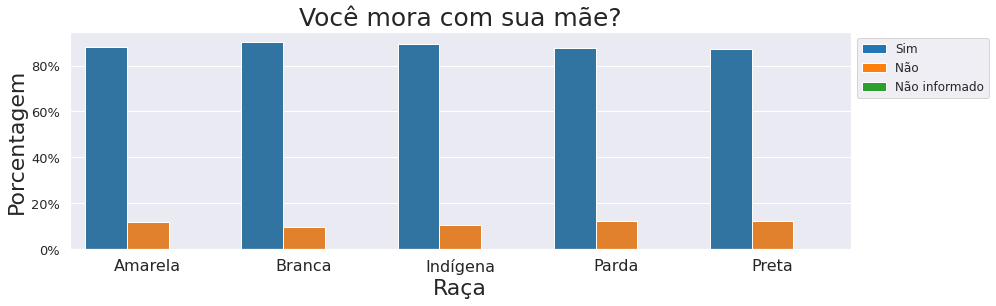

In [39]:
comparacao_barra_norm("VB01006",'raca', tamanho = (14,4))

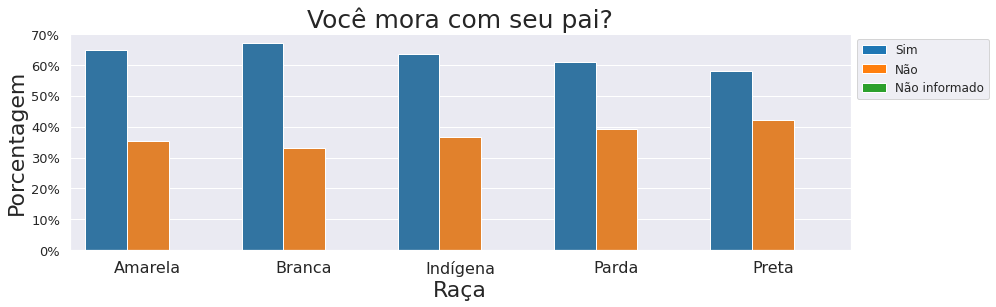

In [40]:
comparacao_barra_norm("VB01007",'raca', tamanho = (14,4))

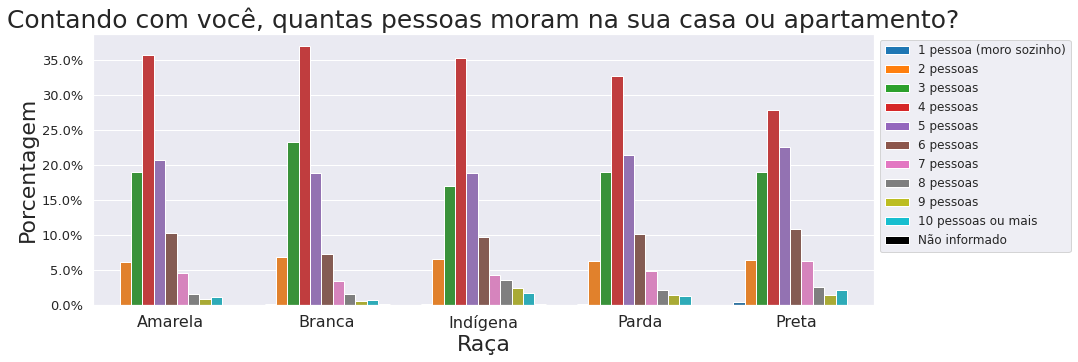

In [41]:
comparacao_barra_norm("VB01010A",'raca', tamanho = (14,5))

- Na pergunta se os escolares moram com as mães, 80% dos respondentes responderam que "Sim".

- Na pesquisa de se eles moram com o pai, tivemos uma diferença entre as respostas significativa. Participantes da cor/raça Parda e Preta tem uma porcentagem menor de morarem com o Pai.

- Avaliando a quantidade de pessoas que moram na casa dos escolares participando da pesquisa, o pico de porcentagem de todas as raças foi de 4 pessoas, porém é possível ver que nos lares Brancos existem lares menores. Lares Pretos tem uma quantidade maior de lares maiores com 5+ pessoas no lar.


### Cigarro, Bebidas Alcoólicas e Drogas Ilícitas

Para essa parte do estudo, foram escolhidas 3 perguntas iguais dessas categorias que inferem:

- Se o escolar já fez o uso do item;
- Qual era sua idade nesse primeiro uso;
- Frequencia de uso daquele item nos últimos 30 dias.

A primeira pergunta é mais genérica com a intenção de ver se já foram usados, mas as seguintes são, respectivamente, para medir o quão cedo o escolar entrou em contato com o item e a peridiocidade do uso do item.

#### Cigarro

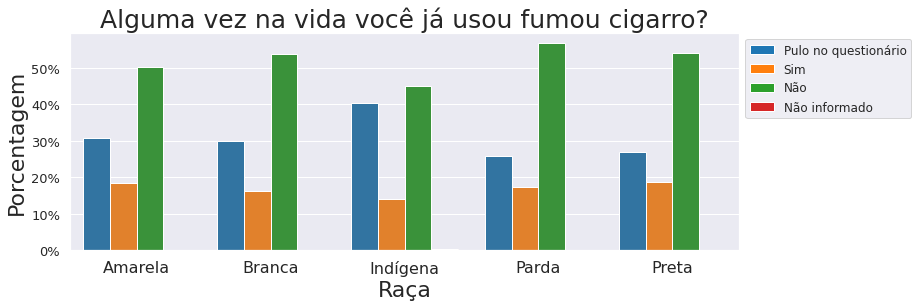

In [54]:
comparacao_barra_norm("VB04001","raca", tamanho=(12,4), titulo = 'Alguma vez na vida você já usou fumou cigarro?')

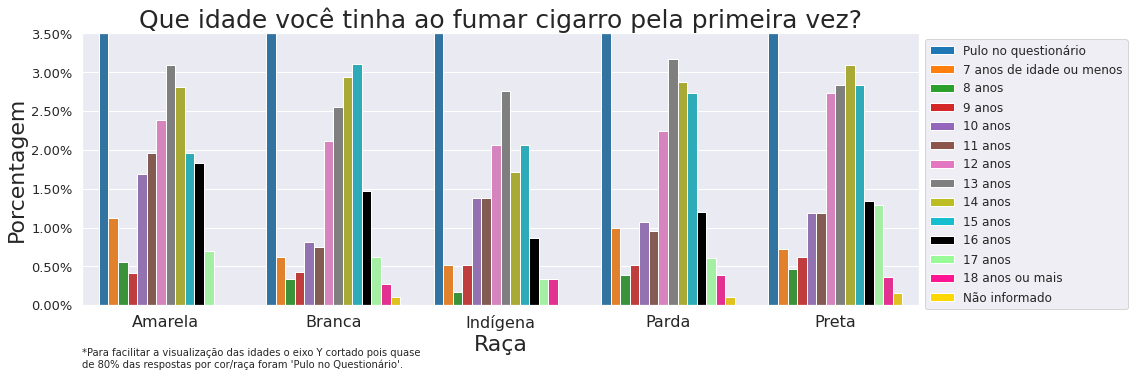

In [55]:
comparacao_barra_norm("VB04002","raca", 
                      tamanho=(15,5),
                      titulo = "Que idade você tinha ao fumar cigarro pela primeira vez?",
                      ylimite = (0,.035),
                      texto = "*Para facilitar a visualização das idades o eixo Y cortado pois quase\nde 80% das respostas por cor/raça foram 'Pulo no Questionário'.")

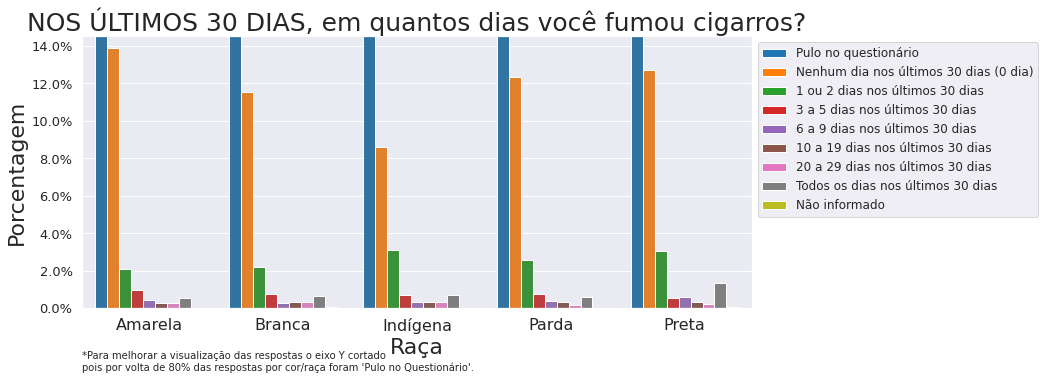

In [56]:
comparacao_barra_norm("VB04003", "raca", tamanho = (12,5),
                      ylimite=(0,0.145),
                      texto = "*Para melhorar a visualização das respostas o eixo Y cortado\npois por volta de 80% das respostas por cor/raça foram 'Pulo no Questionário'.")

- **Os escolares de raça/cor Preta e Amarela são os que tem maior porcentagem de já terem fumado pelo menos uma vez;**

- Vale reforçar que as porcentagens são bem baixas de alunos que responderam as idades da primeira vez que fumaram, mas alguns pontos se destacam: Dentre os escolares de raça/cor **Amarela, Indígena e Parda**, a resposta mais frequente foi de **13 anos**, enquanto **Brancos foram 15 anos** e **Pretos com 14 anos.**

- A recorrência do uso do cigarro é baixa nas respostas apresentadas aqui. Apesar de ter juntamente com pessoas da cor Preta a maior quantidade de pessoas que já fumaram, a cor Amarela é a que tem o maior número de escolares que não fumaram nos ultimos 30 dias. Ainda nesse sentido, alunos do grupo de indígenas juntamente com Pretos um número alto de um uso bem ocasional (1 à 2 vezes nesse ultimo mês). Apesar de estarmos trabalhando com porcentagens bem baixas, **os alunos da raça/cor Preta são os que tiveram a maior porcentagem de terem fumado todos os dias** nos ultimos 30 dias, ou seja, de terem habitos de tabagismo.


#### Bebidas Alcoólicas

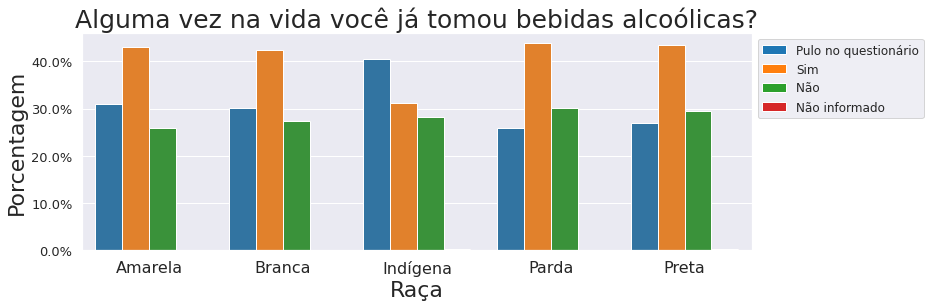

In [57]:
comparacao_barra_norm("VB05002","raca", tamanho=(12,4), titulo = 'Alguma vez na vida você já tomou bebidas alcoólicas?')

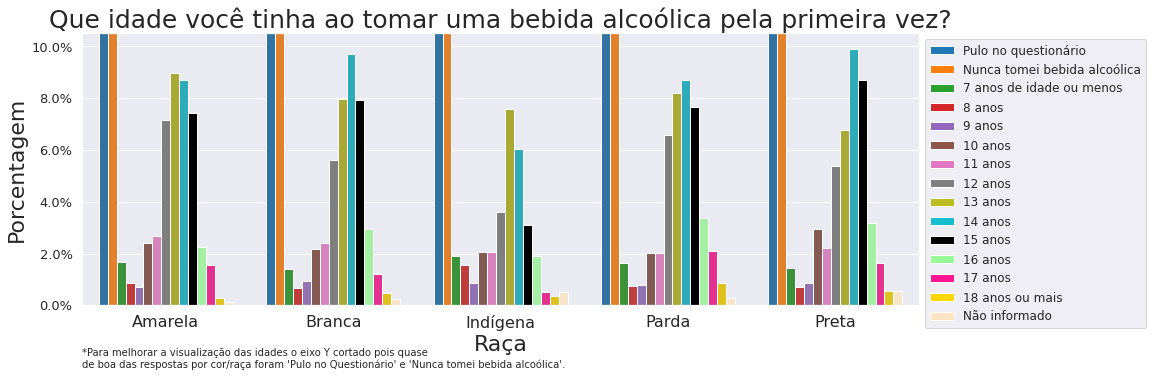

In [58]:
comparacao_barra_norm("VB05003","raca", 
                      tamanho=(15,5),
                      titulo = "Que idade você tinha ao tomar uma bebida alcoólica pela primeira vez?",
                      ylimite = (0,.105),
                      texto = "*Para melhorar a visualização das idades o eixo Y cortado pois quase\nde boa das respostas por cor/raça foram 'Pulo no Questionário' e 'Nunca tomei bebida alcoólica'.")

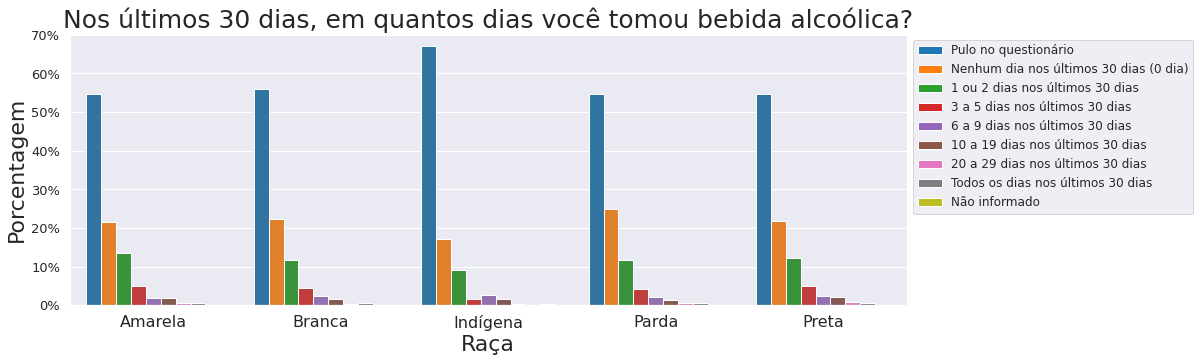

In [59]:
comparacao_barra_norm("VB05004","raca", 
                      tamanho=(15,5),
                      titulo = "Nos últimos 30 dias, em quantos dias você tomou bebida alcoólica?")

- Em todas as raças/cores existem mais participantes que experimentaram bebidas alcoólicas em oposição à aqueles que não o fizeram.

- Com variações entre as cores/raças a tendência geral é de que a experimentação da bebida alcoólica aconteça entre os 12 aos 15 anos.

- Na questão do hábito de consumo de bebida alcoólica é possivel ver que em média 10% de todos os grupos beberam 1 ou 2 dias nos ultimos 30 dias.

#### Drogas Ilícitas

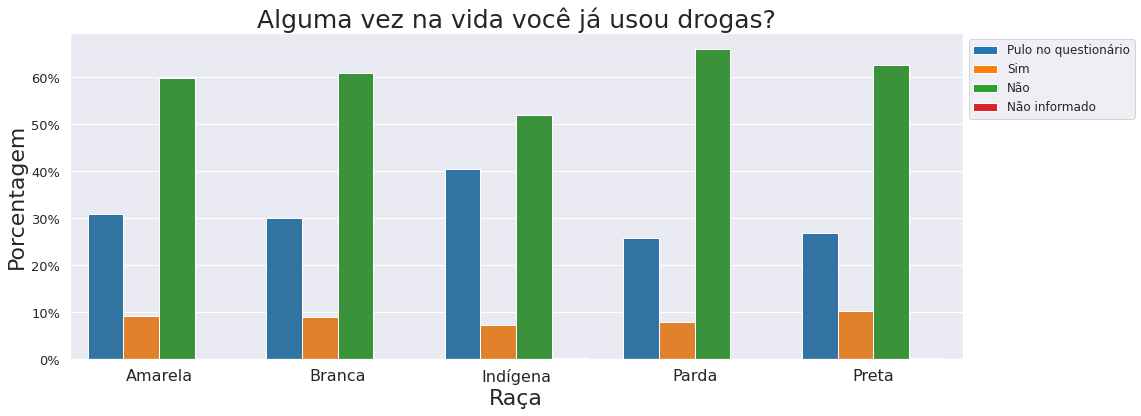

In [60]:
comparacao_barra_norm("VB06001","raca", tamanho=(16,6), titulo = 'Alguma vez na vida você já usou drogas?')

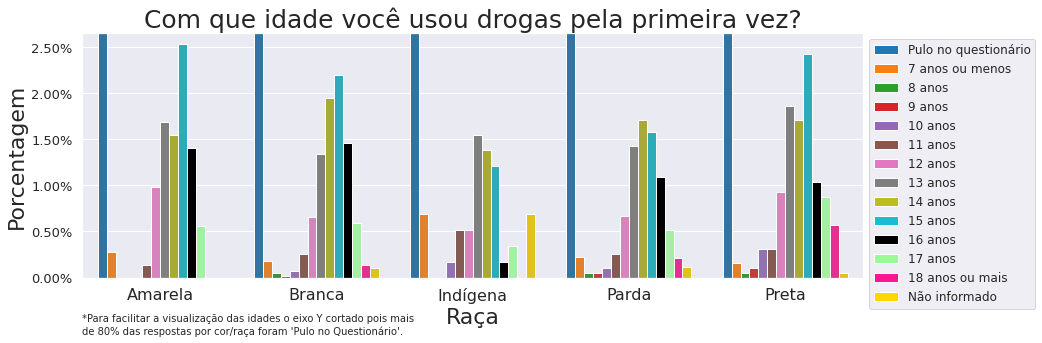

In [61]:
comparacao_barra_norm("VB06002","raca", 
                      tamanho=(14,4.5),
                      titulo = 'Com que idade você usou drogas pela primeira vez?',
                      ylimite = (0,.0265),
                      texto = "*Para facilitar a visualização das idades o eixo Y cortado pois mais\nde 80% das respostas por cor/raça foram 'Pulo no Questionário'.")

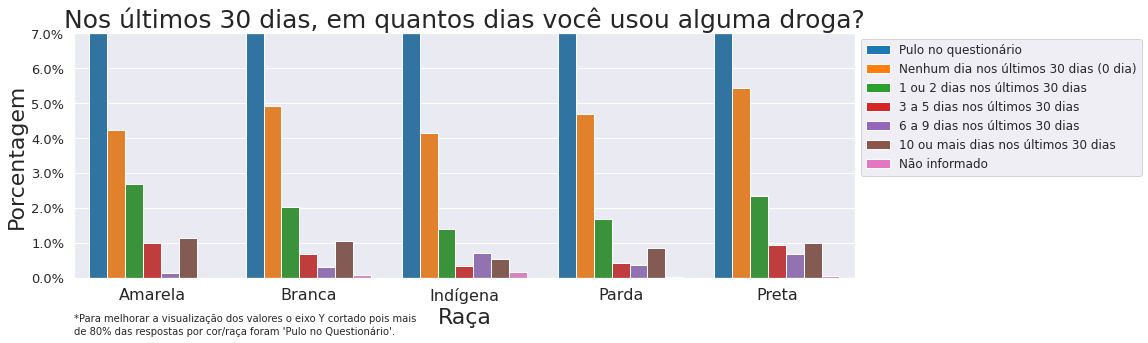

In [62]:
comparacao_barra_norm("VB06003A","raca", 
                      tamanho=(14,4.5),
                      titulo = 'Nos últimos 30 dias, em quantos dias você usou alguma droga?',
                      ylimite = (0,.07),
                      texto = "*Para melhorar a visualização dos valores o eixo Y cortado pois mais\nde 80% das respostas por cor/raça foram 'Pulo no Questionário'.")

- Dos participantes da pesquisa que já usaram algum tipo de droga ilícita somente os de cor/raça Preta são mais de 10%. Indígenas e Pardos tem os valores mais baixos, enquanto os outros (Brancos/Amarelos) estão próximos à 10%.

- O primeiro ponto de destaque é que entre Indígenas há uma tendência diferente dos outros grupos, que é o uso de drogas pela primeira vez ter sido aos '7 anos ou menos' ser um número relativamente alto. Dentre os outros grupos é possivel ver que os participantes de cor Preta e Amarela tem um pico de experimentação aos 15 anos, porém 14 e 13 anos também tem números altos. Alunos de cor/raça branca e parda tem uma distribuição parecida com uma distribuição normal, com o pico entre 14 e 15 anos.

- Os participantes de cor/raça Amarela e Preta são os que tem mais hábitos de uso de drogas ilícitas.

### Situações na Escola/Bullying

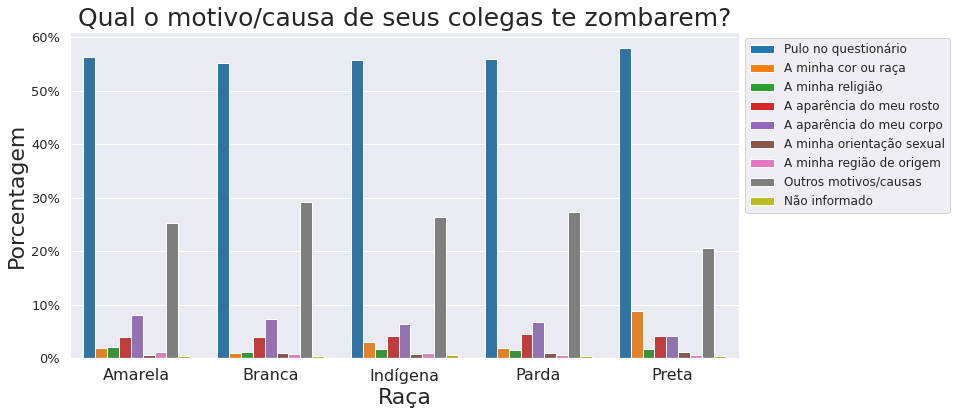

In [77]:
comparacao_barra_norm("VB07008",'raca', tamanho= (12,6),
                      titulo="Qual o motivo/causa de seus colegas te zombarem?")

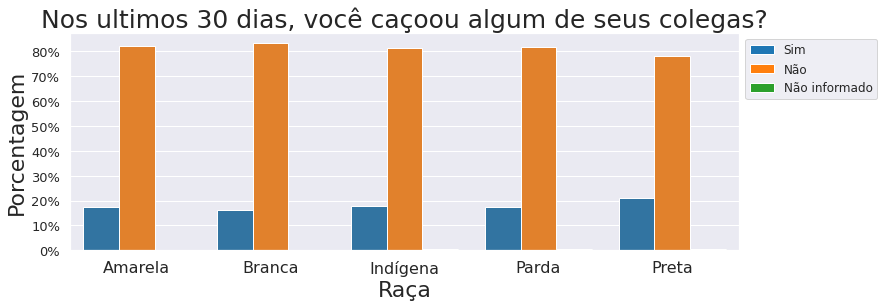

In [65]:
comparacao_barra_norm("VB07009",'raca', tamanho= (12,4),
                      titulo="Nos ultimos 30 dias, você caçoou algum de seus colegas?")

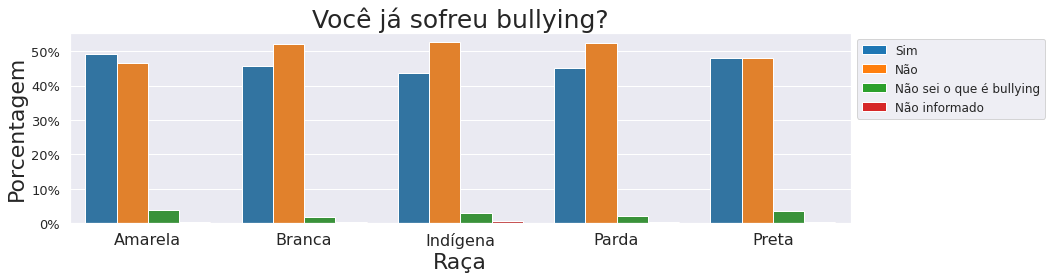

In [79]:
comparacao_barra_norm("VB07010",'raca',tamanho = (14,3.5))

- A pergunta do motivo pelo qual os escolares são zombados mostra um resultado de importante ressalva, quase 10% dos participantes de cor/raça preta sofreram zombarias motivadas pela sua cor ou raça, quando a média das outras raças/cores é de 2 à 3%.

- Quando perguntados se eles caçoaram de seus colegas, as resposteas tendem a ser bem próximas, com mais respostas "sim" da cor/raça preta.

- O última pergunta dessa categoria é se eles já sofreram bullying. Entre Pretos e Amarelos houve a maior incidência de respostas "sim", ambas bem próximas dos 50%. Para Brancos, Pardos e Indígenas mais de 50% das respostas foram que não sofreram bullying. Essa pergunta tinha a possibilidade de resposta "não sei o que é bullying", logo as respostas não foram somente "sim" ou "não"

##Considerações Finais

Vale a pena frisar que essa análise não necessariamente representa a situaçao racial e/ou de desigualdade do país. A proposta foi de tentar mostrar como as questões selecionadas são vivenciadas de formas diferentes dependendo da cor/raça do escolar e assim levantar o assunto de desigualdade de raça ou cor para o debate.

Em cada tópico foi feita um análise mais especifica relacionada ao tópico. Mas gostaria de trazer alguns pontos que se destacaram.

Os lares pretos demonstraram são os que apresentam os maiores valores na resposta da pergunta de quantas pessoas moram em sua casa, assim como também tem a maior parcela de escolares que não moram com os pais.

O consumo de Drogas ilícitas e Cigarro se mostrou mais frequente e presente nos grupos de escolares de cor ou raça Amarela e Preta. O consumo de bebidas alcoólicas apareceu como mais difundido entre os jovens, menos entre os indígenas.

Na categoria que engloba o bullying, o ponto de destaque é que dentre todas as razões de serem caçoados pelos colegas, somente os escolares Pretos tiveram números significativos de a motivação de serem zombados foi pela sua cor ou raça.

A situação socioeconomica é a principal demarcação da desigualdade racial das categorias estudadas. Ela mostrou a vulnerabilidade social dos grupos de Pretos, Pardos e Indigenas, mas em especial o grupo de cor ou raça Preta.








Fica claro que a desigualdade social está enraizada na população brasileira, e o reflexo nos jovens é visivel nessa pesquisa com os dados selecionados. 

A pesquisa não é um fim nela mesma, mas um ponto de reflexão sobre um tópico que merece mais atenção e mais estudo, abaixo seguem alguns artigos e livros que falam sobre racismo, discriminação e desigualdade racial na escola que corroboram com alguns dos resultados presentes aqui nessa análise:

[Quem é negro, quem é branco: desempenho escolar e classificação racial de alunos](https://www.scielo.br/scielo.php?pid=S1413-24782005000100007&script=sci_arttext&tlng=pt)


[Do silêncio do lar ao silêncio escolar: racismo, preconceito e discriminação na educação infantil](https://books.google.ch/books?hl=en&lr=&id=f9VnAwAAQBAJ&oi=fnd&pg=PT6&dq=racismo+escola&ots=1avLSA_xza&sig=WpLp4bkLXGCb00P_vqJUqOyL2oo)

[Desigualdade racial, racismo e seus efeitos](https://www.scielo.br/scielo.php?pid=S1984-02922012000300009&script=sci_arttext&tlng=pt)

[Racismo implícito: um olhar para a educação infantil](https://educere.bruc.com.br/CD2011/pdf/5643_3318.pdf)

[Racismo e educação: um conflito constante](http://www.contemporanea.ufscar.br/index.php/contemporanea/article/view/302)